# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
data = pd.read_csv("Salary_Data.csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.shape

(30, 2)

In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

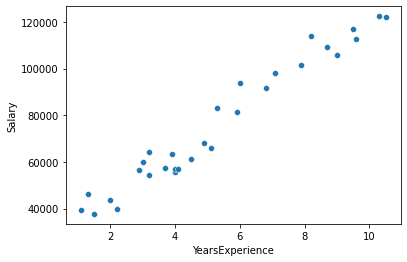

In [8]:
sns.scatterplot(data["YearsExperience"],data["Salary"])

# Define x and y


In [10]:
#Independent Variable - X Label
x = data[["YearsExperience"]]
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [11]:
#Dependent Variable - Y label
y = data[["Salary"]]
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


# Splitting the dataset into training and test set.

In [12]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [144]:
print(x_train)

    YearsExperience
22              7.9
5               2.9
16              5.1
8               3.2
14              4.5
23              8.2
20              6.8
1               1.3
29             10.5
6               3.0
4               2.2
18              5.9
19              6.0
9               3.7
7               3.2
25              9.0
3               2.0
0               1.1
21              7.1
15              4.9
12              4.0


In [145]:
print(y_train)

      Salary
22  101302.0
5    56642.0
16   66029.0
8    64445.0
14   61111.0
23  113812.0
20   91738.0
1    46205.0
29  121872.0
6    60150.0
4    39891.0
18   81363.0
19   93940.0
9    57189.0
7    54445.0
25  105582.0
3    43525.0
0    39343.0
21   98273.0
15   67938.0
12   56957.0


# Fit the Simple Linear Regression model to the training dataset 

In [13]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

LinearRegression()

# Visualizing Training Dataset

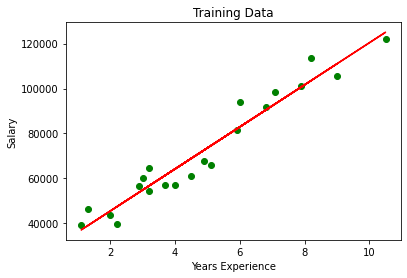

In [147]:
plt.scatter(x_train,y_train,color = 'green')
plt.plot(x_train,regressor.predict(x_train),color = 'red')
plt.title("Training Data")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

# Predicting the result for 1.5 Years Experience in training dataset

In [15]:
train_pred = np.array([1.5]).reshape(-1,1)
regressor.predict(train_pred)

array([[40817.78327049]])

# Visualizing Testing Dataset

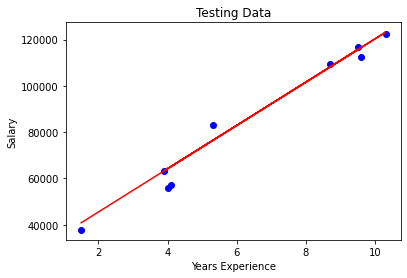

In [149]:
plt.scatter(x_test,y_test,color = "blue")
plt.plot(x_test,regressor.predict(x_test),color = "red")
plt.title("Testing Data")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

# Predicting the trained dataset

In [16]:
y__train_pred = regressor.predict(x_train)
y__train_pred

array([[100723.45550213],
       [ 53922.14907116],
       [ 74514.72390079],
       [ 56730.22745702],
       [ 68898.56712907],
       [103531.53388799],
       [ 90427.16808731],
       [ 38945.73101325],
       [125060.13484623],
       [ 54858.17519978],
       [ 47369.96617082],
       [ 82002.93292974],
       [ 82938.95905836],
       [ 61410.35810011],
       [ 56730.22745702],
       [111019.74291694],
       [ 45497.91391358],
       [ 37073.67875601],
       [ 93235.24647317],
       [ 72642.67164355],
       [ 64218.43648597]])

# Predicting the Test dataset

In [17]:
y__test_pred = regressor.predict(x_test)
y__test_pred

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [152]:
#y = mx+c
print(regressor.coef_)
print(regressor.intercept_)

[[9360.26128619]]
[26777.3913412]


# Predicting the result of 25 Years Experience

In [18]:
unseen_pred = np.array([25]).reshape(-1,1)
regressor.predict(unseen_pred)

array([[260783.92349604]])

# Evaluate the model

In [19]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y__test_pred)
print("mae : ", mae)

mae :  3737.417861878896


In [20]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y__test_pred )
print("mse : ", mse)

mse :  23370078.800832972


In [21]:
#Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y__test_pred ))
print("rmse : ", rmse)

rmse :  4834.260936361728


In [22]:
#R2 Score
from sklearn.metrics import mean_squared_error, r2_score
r_value = r2_score(y_test, y__test_pred)
print("r2_score : ", r_value)

r2_score :  0.9740993407213511
